<a href="https://colab.research.google.com/github/jon4444/diamond-classification/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

file_path = "/content/sample_data/diamonds.csv"

df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


Summary of Steps:
- Load and inspect the data: Check columns, data types, and summary statistics.
- Handle missing data: Identify and handle missing or null values.
- Visualize distributions: Use histograms and bar plots.
- Examine relationships: Look at scatter plots, correlations, and boxplots for numerical and categorical variables.
- Analyze price: Visualize the relationship between price and other features.
- Outlier detection: Use visualizations like boxplots to identify outliers.
- Handle multicollinearity: Check for correlations between numerical features.
- Feature engineering: Create new features or transformations if needed.
- Prepare for modeling: Scale features if necessary and check for class imbalances.

In [6]:
# Separate Numerical and Categorical Columns
# Based on the output of df.info(), we manually specify columns
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
categorical_columns = ['cut', 'color', 'clarity']


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

print(df.isnull().sum())

# drop columns with too many mising values
df=df.dropna(axis=1, thresh=0.5*len(df))

# impute missing numerical values with the mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# impute missing categorical values with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [8]:
# remove duplicate rows
df = df.drop_duplicates()

In [9]:
# df.to_excel('diamonds_cleaned.xlsx', index=False)

In [10]:
scaler = StandardScaler()
scaled_carat = scaler.fit_transform(df[['carat']])
# normalize a numerical column
scaled_carat= scaler.fit_transform(df[numerical_columns])

In [11]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_columns = ['cut', 'color', 'clarity']

# Instantiate OneHotEncoder with sparse_output=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=False to return a dense array

encoded_cols = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_columns))


# merge back to the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# drop the original categorical columns
# df = df.drop(categorical_columns, axis=1)

print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35   

   ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  clarity_SI2  \
0  ...      0.0      0.0         0.0         0.0          0.0          1.0   
1  ...      0.0      0.0         0.0         0.0          1.0          0.0   
2  ...      0.0      0.0         0.0         0.0          0.0          0.0   
3  ...      1.0      0.0         0.0         0.0          0.0          0.0   
4  ...      0.0      1.0         0.0         0.0          0.0          1.0   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity

In [12]:
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


In [13]:
# split data into training and test sets
x = df.drop('cut', axis=1)
y = df['cut']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (43152, 30)
Test set size: (10788, 30)


In [14]:
# save preprocessed data
df.to_csv('preprocessed_data.csv', index=False)
df.to_pickle('preprocessed_data.pkl')

In [15]:
print(df.head(50))

    Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0            1   0.23      Ideal     E     SI2   61.5   55.0  326.0  3.95   
1            2   0.21    Premium     E     SI1   59.8   61.0  326.0  3.89   
2            3   0.23       Good     E     VS1   56.9   65.0  327.0  4.05   
3            4   0.29    Premium     I     VS2   62.4   58.0  334.0  4.20   
4            5   0.31       Good     J     SI2   63.3   58.0  335.0  4.34   
5            6   0.24  Very Good     J    VVS2   62.8   57.0  336.0  3.94   
6            7   0.24  Very Good     I    VVS1   62.3   57.0  336.0  3.95   
7            8   0.26  Very Good     H     SI1   61.9   55.0  337.0  4.07   
8            9   0.22       Fair     E     VS2   65.1   61.0  337.0  3.87   
9           10   0.23  Very Good     H     VS1   59.4   61.0  338.0  4.00   
10          11   0.30       Good     J     SI1   64.0   55.0  339.0  4.25   
11          12   0.23      Ideal     J     VS1   62.8   56.0  340.0  3.93   

# Visualize dstribution

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

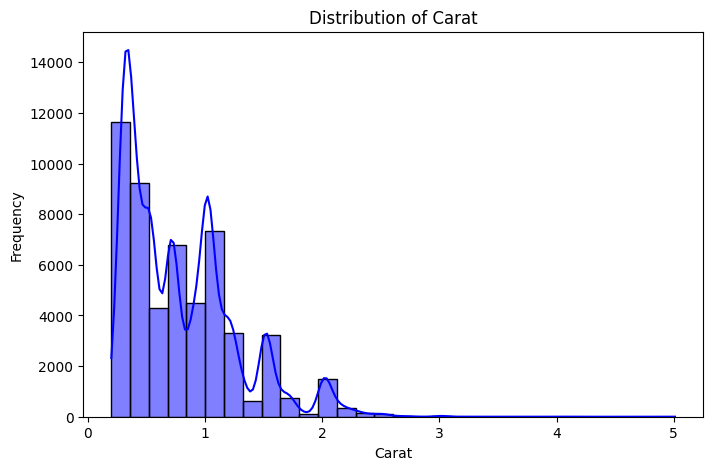

In [17]:
# Histogram for 'carat'
plt.figure(figsize=(8, 5))
sns.histplot(df['carat'], bins=30, kde=True, color='blue')
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-94e0849536f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='clarity', y='price', data=avg_price_by_clarity, palette='plasma')


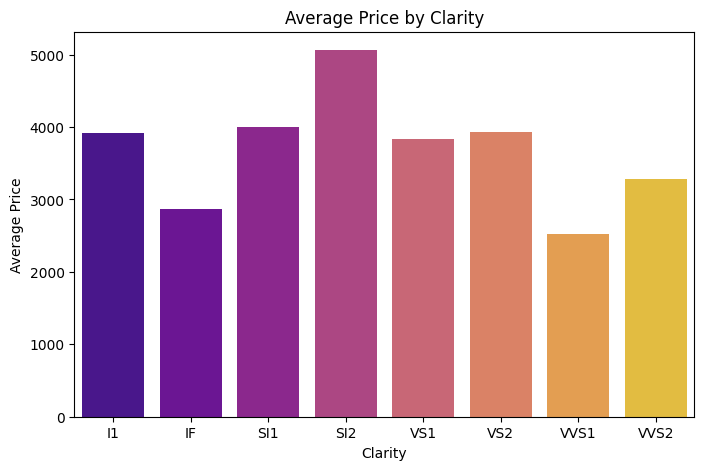

In [18]:
# Bar plot of average price by clarity
avg_price_by_clarity = df.groupby('clarity')['price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='clarity', y='price', data=avg_price_by_clarity, palette='plasma')
plt.title('Average Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Average Price')
plt.show()

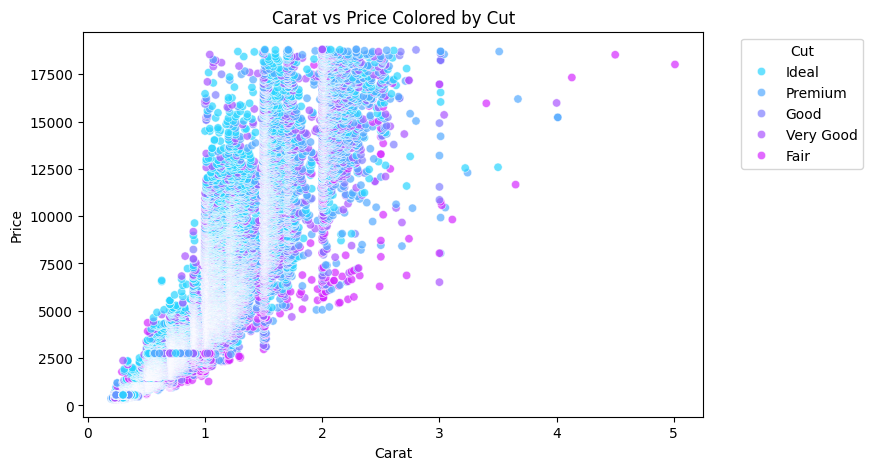

In [19]:
# Scatter plot for carat vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=df, hue='cut', palette='cool', alpha=0.7)
plt.title('Carat vs Price Colored by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

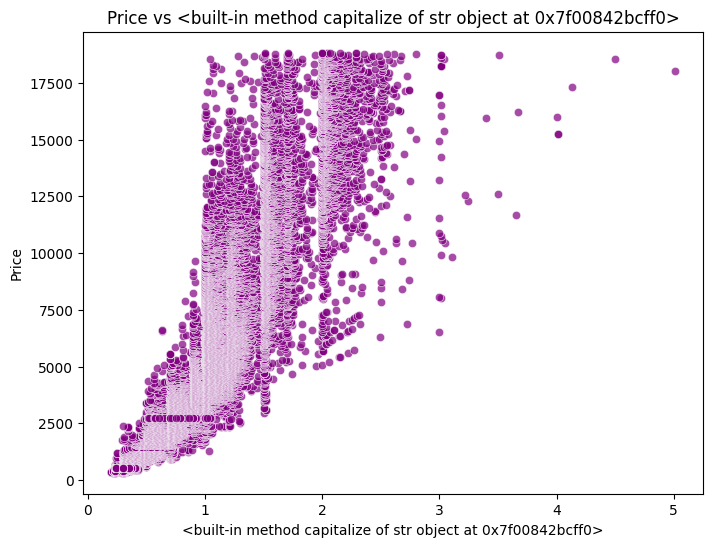

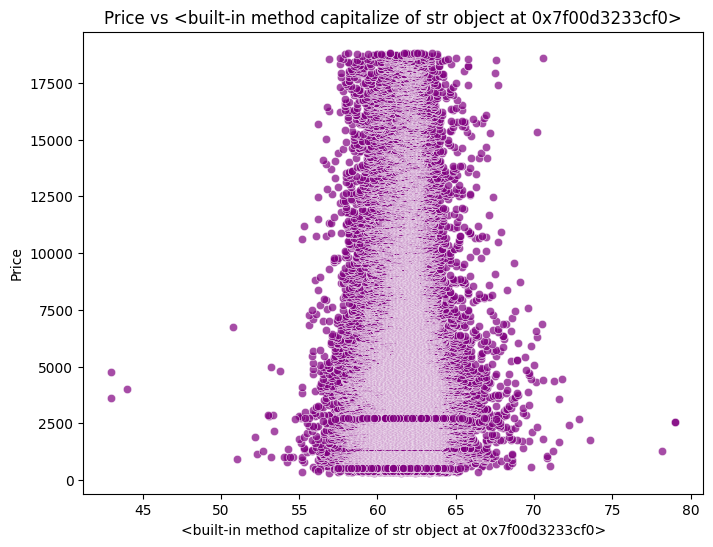

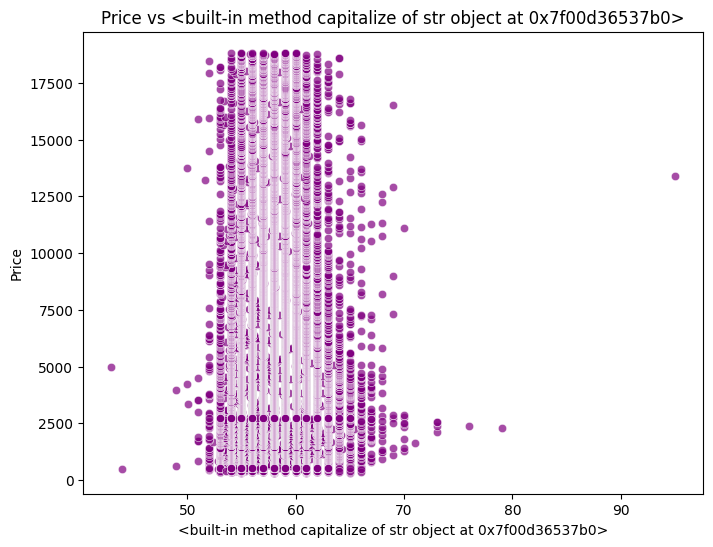

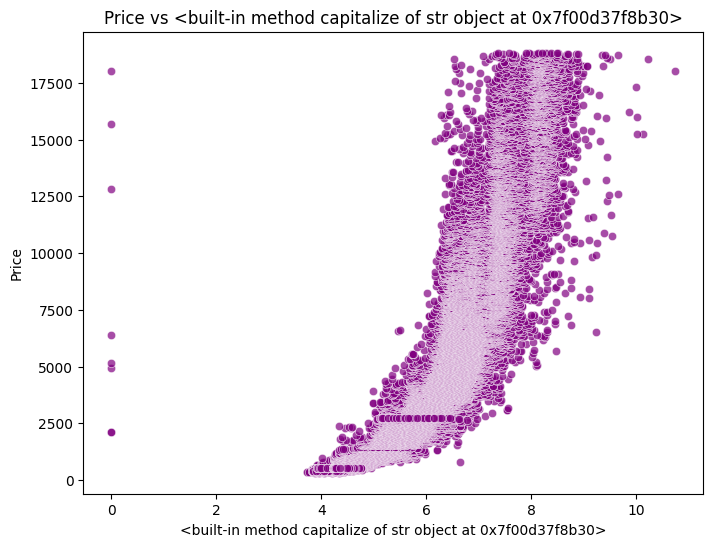

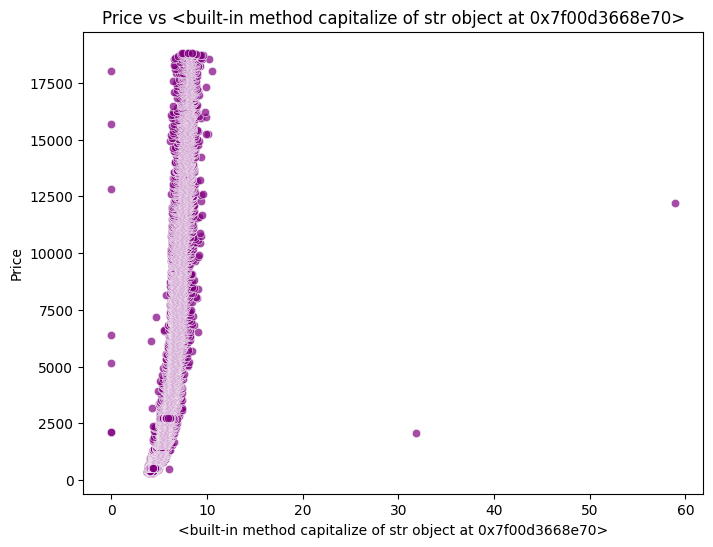

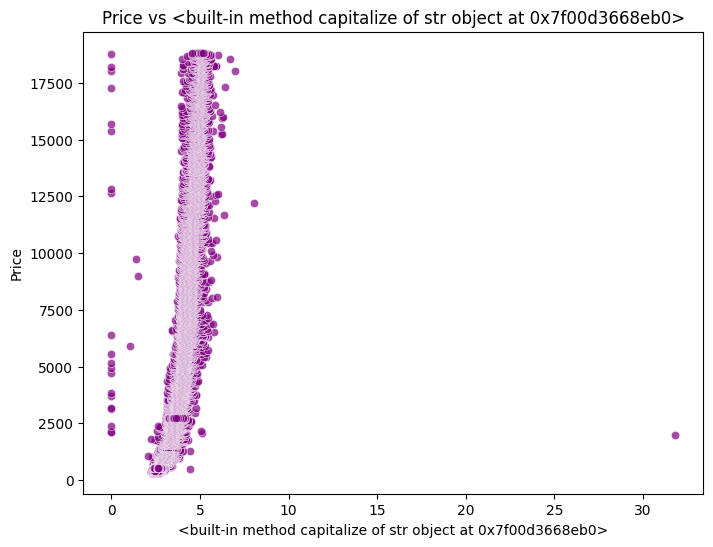

In [21]:
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=feature, y='price', data=df, color='purple', alpha=0.7)
  plt.title(f'Price vs {feature.capitalize}')
  plt.xlabel(feature.capitalize)
  plt.ylabel('Price')
  plt.show()

## Plot Analysis

- Price vs Carat: Diamond prices increase with carat weight, peaking between 1 to 3 carats, with notable outliers above this range.
- Price vs Depth: Most diamonds have a depth percentage between 55% and 65%, but price shows no strong correlation with depth.
- Price vs Table: Diamonds with table percentages between 55% and 70% dominate, with prices peaking around $17,500.
- Length (x) vs Price: The majority of diamonds measure 4–8 mm in length, where prices surpass $17,500. The longest diamond (~10 mm) is similarly priced.
- Price vs Width (y): The widest diamonds (up to $12,500) are less frequent, while those between 4–8 mm width are more common and include prices exceeding $17,500.
- Price vs Depth (z): Most diamonds have depths of 2–5 mm, with prices peaking above $17,500. Deeper diamonds are rarer and generally less valuable.

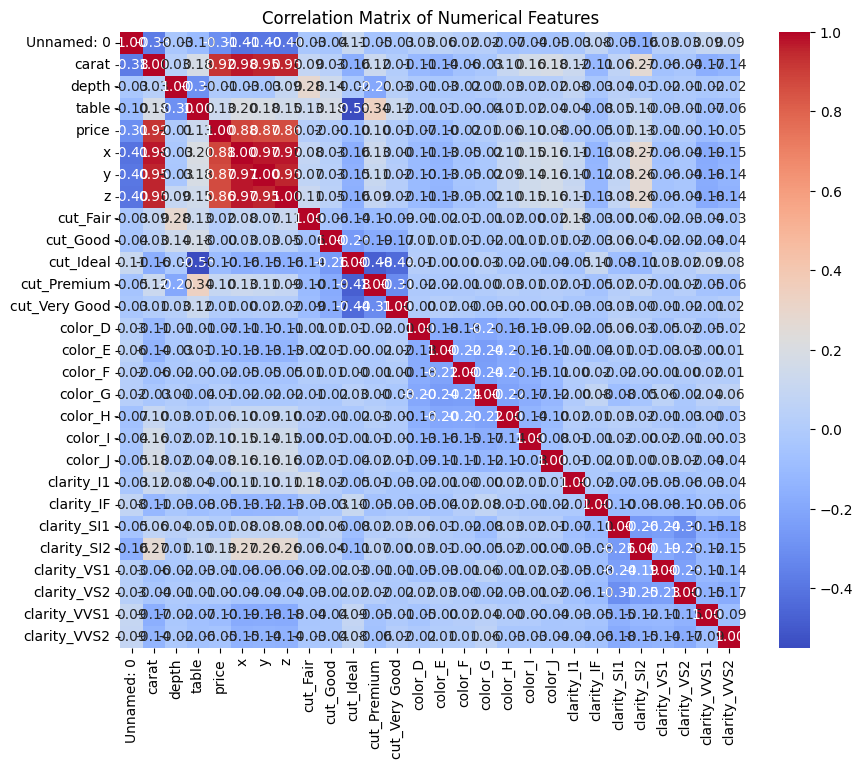

In [24]:
# Check for Correlations Using a Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [37]:
threshold = 0.8
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)].stack()
print("High Correlation features:/n", high_corr)
# Strong Correlations:
# carat correlates strongly with x (0.975094), y (0.951722), and z (0.953387), meaning diamond weight is closely tied to its dimensions.
# price also correlates well with carat (0.921591), indicating that weight significantly impacts the price.
# Interrelated Dimensions:
# x, y, and z (dimensions) are all highly correlated with each other (e.g., x vs. z is 0.970772), which makes sense since they collectively represent the size of the diamond.

High Correlation features:/n carat  price    0.921591
       x        0.975094
       y        0.951722
       z        0.953387
price  carat    0.921591
       x        0.884435
       y        0.865421
       z        0.861249
x      carat    0.975094
       price    0.884435
       y        0.974701
       z        0.970772
y      carat    0.951722
       price    0.865421
       x        0.974701
       z        0.952006
z      carat    0.953387
       price    0.861249
       x        0.970772
       y        0.952006
dtype: float64


In [44]:
diamonds_df = df.drop(columns=['x'])  # Drop 'x' if it's highly correlated with another feature
print(diamonds_df.columns)


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')


In [45]:
diamonds_df['volume'] = diamonds_df['y'] * diamonds_df['z']

In [48]:
from sklearn.decomposition import PCA

numerical_features = ['carat', 'depth', 'table','y', 'z']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(diamonds_df[numerical_features])

#Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

#Add PCA components back to the dataframe
diamonds_df['PCA1'] = pca_features[:, 0]
diamonds_df['PCA2'] = pca_features[:, 1]

# drop the orginal numerical features if necessary
# diamonds_df = diamonds_df.drop(columns=numerical_features)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features

vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

print(vif_data)

  feature        VIF
0   carat  14.300114
1   depth   1.301740
2   table   1.141596
3       y  15.662011
4       z  16.496237
